In [2]:
#!pip install openqaoa

In [3]:
from openqaoa.problems import MIS
from openqaoa import QAOA  
from openqaoa.utilities import ground_state_hamiltonian
from openqaoa.backends import create_device
import matplotlib.pyplot as plt
import networkx as nx

# Define problem

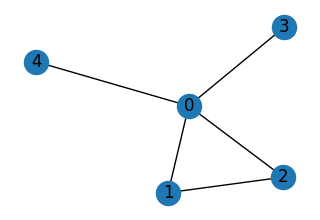

In [19]:
G = nx.Graph([(0, 1),(0, 2),(0, 3),(0, 4), (1, 2)])
plt.figure(figsize=(3,2))
pos = nx.spring_layout(G)  # , seed=39299899
nx.draw(G,pos=pos,with_labels=True)

## Create QUBO problem

In [20]:
problem = MIS(G)
qubo_problem = problem.qubo
qubo_problem.hamiltonian.expression

-- cannot find parameters matching version: , using: 22.1.1.0
-- cannot find parameters matching version: , using: 22.1.1.0


-0.5Z_{1} - 0.5Z_{2} - 1.5Z_{0} + 0.0 + 0.0Z_{3} + 0.0Z_{4} + 0.5Z_{0}Z_{1} + 0.5Z_{0}Z_{2} + 0.5Z_{0}Z_{3} + 0.5Z_{0}Z_{4} + 0.5Z_{1}Z_{2}

## Define properties of the QAOA model

In [21]:
qiskit_device = create_device(location='local', name='qiskit.shot_simulator')
q = QAOA()
q.set_device(qiskit_device)
q.set_circuit_properties(p=1,param_type='standard', init_type='rand', mixer_hamiltonian='x')
q.set_backend_properties(n_shots=1024, seed_simulator=1)
q.set_classical_optimizer(method='nelder-mead', maxiter=200, tol=0.001,
                          optimization_progress=True, cost_progress=True, parameter_log=True)

In [22]:
q.compile(qubo_problem)

## Print Circuit used in the model

In [23]:
q.backend.parametric_circuit.draw()

┌───┐                                                    »
q2_0: ┤ H ├─■─────────────────────────■────────────────────────»
      ├───┤ │ZZ(2Q_COST_seq0_layer0)  │                        »
q2_1: ┤ H ├─■─────────────────────────┼────────────────────────»
      ├───┤                           │ZZ(2Q_COST_seq1_layer0) »
q2_2: ┤ H ├───────────────────────────■────────────────────────»
      ├───┤                                                    »
q2_3: ┤ H ├────────────────────────────────────────────────────»
      ├───┤                                                    »
q2_4: ┤ H ├────────────────────────────────────────────────────»
      └───┘                                                    »
«                                                           »
«q2_0: ─■───────────────────────────────────────────────────»
«       │                                                   »
«q2_1: ─┼──────────────────────────■────────────────────────»
«       │                          │ZZ(2Q_COST_seq4_layer0) »
«q2_2: ─┼──────────────────────────■────────────────────────»
«       │ZZ(2Q_COST_seq2_layer0) ┌─────────────────────────┐»
«q2_3: ─■────────────────────────┤ Rz(1Q_COST_seq3_layer0) ├»
«                                └─────────────────────────┘»
«q2_4: ─────────────────────────────────────────────────────»
«                                                           »
«                                ┌─────────────────────────┐ »
«q2_0: ─■────────────────────────┤ Rz(1Q_COST_seq0_layer0) ├─»
«       │                        ├─────────────────────────┤ »
«q2_1: ─┼────────────────────────┤ Rz(1Q_COST_seq1_layer0) ├─»
«       │                        ├─────────────────────────┤ »
«q2_2: ─┼────────────────────────┤ Rz(1Q_COST_seq2_layer0) ├─»
«       │                        ├─────────────────────────┴┐»
«q2_3: ─┼────────────────────────┤ Rx(1Q_MIXER_seq3_layer0) ├»
«       │ZZ(2Q_COST_seq3_layer0) ├─────────────────────────┬┘»
«q2_4: ─■────────────────────────┤ Rz(1Q_COST_seq4_layer0) ├─»
«                                └─────────────────────────┘ »
«      ┌──────────────────────────┐
«q2_0: ┤ Rx(1Q_MIXER_seq0_layer0) ├
«      ├──────────────────────────┤
«q2_1: ┤ Rx(1Q_MIXER_seq1_layer0) ├
«      ├──────────────────────────┤
«q2_2: ┤ Rx(1Q_MIXER_seq2_layer0) ├
«      └──────────────────────────┘
«q2_3: ────────────────────────────
«      ┌──────────────────────────┐
«q2_4: ┤ Rx(1Q_MIXER_seq4_layer0) ├
«      └──────────────────────────┘

In [24]:
## Oprimize and solution

In [50]:
q.optimize()
correct_solution = ground_state_hamiltonian(q.cost_hamil)
#print(correct_solution)

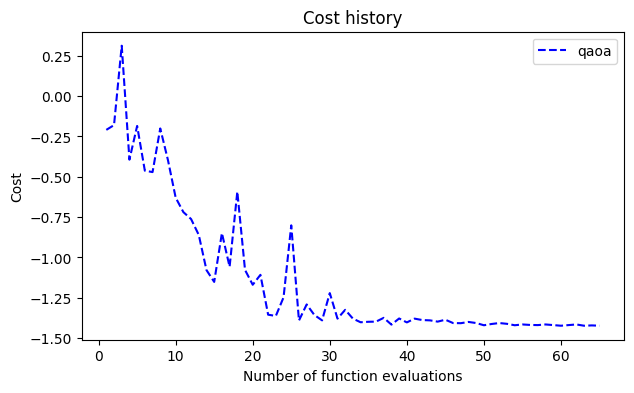

In [26]:
opt_results1 = q.result
opt_results1.plot_cost(figsize=(7,4),label='qaoa')

states kept: 30


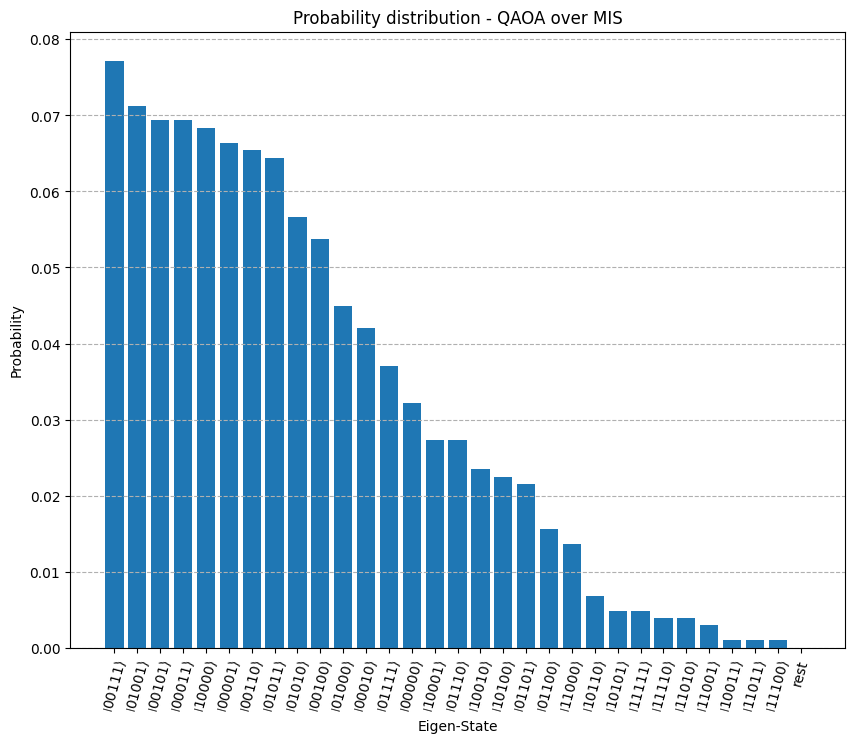

In [47]:
opt_results1.plot_probabilities(label="Probability distribution - QAOA over MIS")

# Example 2

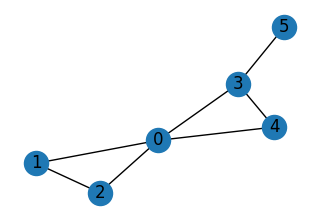

In [30]:
G_example_2 = nx.Graph([(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (3, 4), (3, 5)])
plt.figure(figsize=(3,2))
pos = nx.spring_layout(G_example_2)  # , seed=39299899
nx.draw(G_example_2,pos=pos,with_labels=True)

In [40]:
problem_example_2 = MIS(G_example_2)
qubo_example_2 = problem_example_2.qubo
#qubo_example_2.hamiltonian.expression

qiskit_device = create_device(location='local', name='qiskit.shot_simulator')
q_example_2 = QAOA()
q_example_2.set_device(qiskit_device)
q_example_2.set_circuit_properties(p=3,param_type='standard', init_type='rand', mixer_hamiltonian='x')
q_example_2.set_backend_properties(n_shots=1024, seed_simulator=1)
q_example_2.set_classical_optimizer(method='nelder-mead', maxiter=200, tol=0.001,
                                     optimization_progress=True, cost_progress=True, parameter_log=True)

-- cannot find parameters matching version: , using: 22.1.1.0
-- cannot find parameters matching version: , using: 22.1.1.0


In [41]:
q_example_2.compile(qubo_example_2)

In [51]:
q_example_2.optimize()
correct_solution_example_2 = ground_state_hamiltonian(q_example_2.cost_hamil)
#print(correct_solution_example_2)

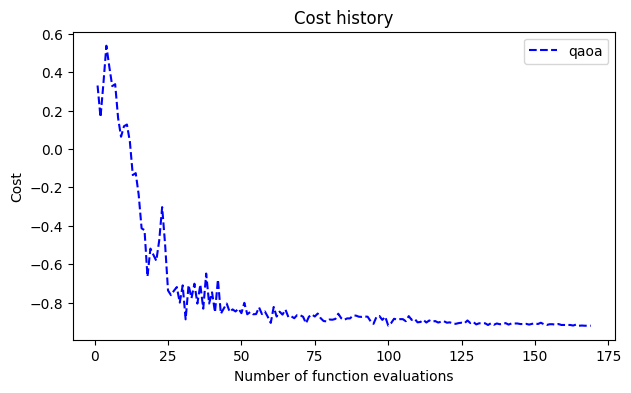

In [43]:
opt_results_2 = q_example_2.result
opt_results_2.plot_cost(figsize=(7,4),label='qaoa')

states kept: 40


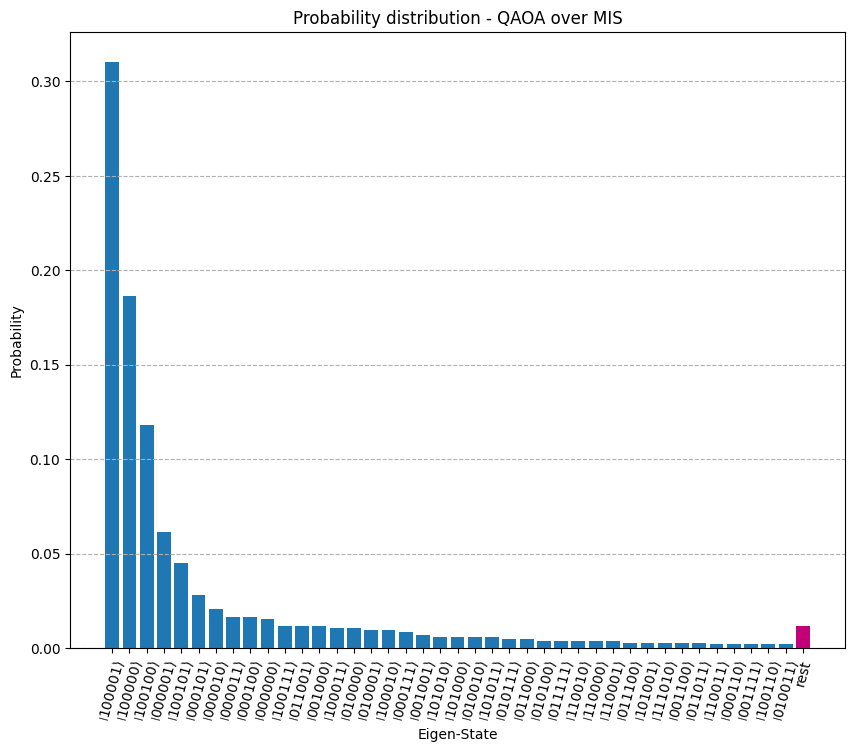

In [48]:
opt_results_2.plot_probabilities(label="Probability distribution - QAOA over MIS")